In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_predict
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

In [ ]:
df_train = pd.read_csv('training_set.csv') # load the data
df_train.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
0,2.699786,4.210166,2.604790,3.117928,0.445622,3.776352,0.638567,4.130338,3.910140,3.543723,...,1.515642,1.315563,1.800682,0.438214,4.684789,2.769011,1.527622,1.984908,2.236013,1.154200
1,2.492038,1.982893,4.692109,2.552023,2.337053,3.362172,1.306171,1.623964,4.660229,3.392649,...,1.355559,2.718951,4.856981,1.593519,0.802382,2.554430,1.939105,0.797886,4.442757,2.509262
2,0.494762,3.413209,1.264181,1.959906,3.229671,2.182437,1.252730,1.672231,1.707741,4.796620,...,2.292744,0.999105,4.055081,0.785912,1.052311,1.830067,4.401741,0.658933,0.611171,0.096078
3,1.456147,4.037558,2.407315,3.274240,0.946368,2.667538,1.589880,2.632068,3.904129,3.844566,...,3.471386,4.706450,3.128347,0.742051,3.398543,0.524522,4.360552,2.583302,1.925704,1.569510
4,4.394406,1.574666,0.644895,2.342306,2.991530,0.154853,1.374478,0.163999,2.101677,4.475500,...,3.185238,0.808188,4.529247,2.581239,0.768747,4.608633,3.787345,3.658526,3.545904,-0.741055


In [ ]:
df_train.info() # get some info of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      750 non-null    float64
 1   X1      750 non-null    float64
 2   X2      750 non-null    float64
 3   X3      750 non-null    float64
 4   X4      750 non-null    float64
 5   X5      750 non-null    float64
 6   X6      750 non-null    float64
 7   X7      750 non-null    float64
 8   X8      750 non-null    float64
 9   X9      750 non-null    float64
 10  X10     750 non-null    float64
 11  X11     750 non-null    float64
 12  X12     750 non-null    float64
 13  X13     750 non-null    float64
 14  X14     750 non-null    float64
 15  X15     750 non-null    float64
 16  X16     750 non-null    float64
 17  X17     750 non-null    float64
 18  X18     750 non-null    float64
 19  X19     750 non-null    float64
 20  y       750 non-null    float64
dtypes: float64(21)
memory usage: 123.2 KB


In [ ]:
df_train.describe(include='all') # find all the descriptive statistics

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X11,X12,X13,X14,X15,X16,X17,X18,X19,y
count,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,...,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000,750.000000
mean,2.519700,2.459476,2.564704,2.485659,2.492346,2.552303,2.487033,2.510325,2.564264,2.426529,...,2.509890,2.423111,2.489251,2.546480,2.487053,2.459520,2.563114,2.514832,2.507344,1.243977
std,1.417405,1.434879,1.440272,1.406441,1.421899,1.439931,1.451266,1.466703,1.401814,1.443550,...,1.511955,1.478356,1.395035,1.431512,1.427561,1.400061,1.431320,1.434440,1.462150,1.229728
min,0.001262,0.023160,0.000058,0.000789,0.000673,0.001135,0.003267,0.000264,0.008624,0.005560,...,0.000154,0.003948,0.015608,0.001549,0.003584,0.002990,0.009961,0.004529,0.028853,-1.892362
25%,1.356004,1.228638,1.230003,1.347662,1.293080,1.330573,1.253147,1.273875,1.413687,1.197545,...,1.115669,1.128334,1.345359,1.327742,1.263259,1.270184,1.420306,1.261704,1.179229,0.339755
50%,2.552419,2.519088,2.686080,2.428134,2.420943,2.646105,2.450613,2.482712,2.596845,2.364132,...,2.581527,2.445066,2.466571,2.542642,2.468240,2.490741,2.547353,2.481464,2.508924,1.226969
75%,3.773946,3.685678,3.815053,3.641781,3.740733,3.773586,3.732154,3.793468,3.782125,3.642483,...,3.841920,3.639374,3.671585,3.795774,3.708587,3.638835,3.792449,3.754281,3.786163,2.148302
max,4.983416,4.988361,4.994463,4.993965,4.997069,4.997295,4.963935,4.997526,4.982610,4.998366,...,4.998588,4.999357,4.990874,4.991738,4.994523,4.989489,4.994715,4.999624,4.996676,4.137843


In [ ]:
df_train['X10'].describe() # X10 was not shown in the previous table

count    750.000000
mean       2.425695
std        1.450835
min        0.002771
25%        1.146555
50%        2.377606
75%        3.748362
max        4.999026
Name: X10, dtype: float64

In [ ]:
z = df_train.corr() # find the correlation of the variables
z['y']

X0    -0.492840
X1    -0.391412
X2     0.602594
X3    -0.036102
X4    -0.036740
X5     0.033325
X6     0.023363
X7     0.014339
X8    -0.041991
X9    -0.017163
X10   -0.024466
X11   -0.043575
X12   -0.024907
X13   -0.002027
X14    0.058643
X15   -0.013269
X16    0.045902
X17    0.018191
X18    0.032225
X19    0.038900
y      1.000000
Name: y, dtype: float64

In [ ]:
X = df_train.drop('y', axis=1).values # save all values apart from 'y'
y = df_train['y'].values # only save y values
X[:5], y[:5] # check the first couple of entries for both

(array([[2.69978565, 4.21016647, 2.60478989, 3.11792844, 0.44562216,
         3.7763521 , 0.63856742, 4.13033815, 3.91014044, 3.54372349,
         0.1808019 , 1.51564178, 1.31556285, 1.80068204, 0.43821373,
         4.68478912, 2.7690112 , 1.52762155, 1.98490759, 2.2360127 ],
        [2.49203771, 1.98289281, 4.69210926, 2.55202344, 2.3370525 ,
         3.36217201, 1.30617101, 1.62396435, 4.66022918, 3.39264923,
         4.13318574, 1.35555881, 2.71895095, 4.85698133, 1.5935195 ,
         0.80238238, 2.55443004, 1.93910544, 0.79788616, 4.44275691],
        [0.49476151, 3.41320901, 1.26418102, 1.95990556, 3.22967092,
         2.18243675, 1.25273029, 1.67223093, 1.70774058, 4.79661952,
         3.99306508, 2.29274386, 0.9991046 , 4.05508055, 0.78591236,
         1.05231109, 1.83006696, 4.40174098, 0.65893334, 0.61117096],
        [1.45614664, 4.03755798, 2.40731459, 3.27424031, 0.9463675 ,
         2.66753831, 1.58988025, 2.63206805, 3.90412917, 3.84456605,
         1.77110339, 3.47138559

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.25, random_state=42) # split the data with 25% test and the rest in the training set

In [ ]:
lasso = Lasso(fit_intercept=False, max_iter=10000) # compute lasso
alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] # different lambda values to test
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(lasso, param_grid, cv=10, scoring='neg_mean_squared_error') # use gridsearch and cross validation to find optimal lambda values
grid_search.fit(X_train, y_train)
best_lasso = grid_search.best_estimator_
y_lasso_pred = best_lasso.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
feature_names = df_train.columns.tolist()
coefficients_lasso = best_lasso.coef_
coefficients_map_lasso = dict(zip(feature_names, coefficients_lasso)) # to allow it to be saved with the labels and to a df just for better visualastion


print("Best alpha:", best_lasso.alpha)
print("Mean Squared Error:", mse_lasso)
print("Mean Absolute Error:", mae_lasso)
coefficients_df_lasso = pd.DataFrame.from_dict(coefficients_map_lasso, orient='index', columns=['Coefficient'])
coefficients_df_lasso

Best alpha: 0.01
Mean Squared Error: 0.4933385726763953
Mean Absolute Error: 0.5737895612969942


,Coefficient
X0,-0.329833
X1,-0.276740
X2,0.536186
X3,0.000000
X4,0.018335
X5,0.064022
X6,0.046634
X7,0.007391
X8,0.000000
X9,-0.000000


In [ ]:
ridge = Ridge(fit_intercept=False) # repeat the same as lasso but with ridge
alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_ridge = grid_search.best_estimator_
y_best_ridge = best_ridge.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_best_ridge)
mae_ridge = mean_absolute_error(y_test, y_best_ridge)


print("Best alpha:", best_ridge.alpha)
print("Mean Squared Error:", mse_ridge)
print("Mean Absolute Error:", mae_ridge)
coefficients_ridge = best_ridge.coef_
coefficients_map_ridge = dict(zip(feature_names, coefficients_ridge))
coefficients_df_ridge = pd.DataFrame.from_dict(coefficients_map_ridge, orient='index', columns=['Coefficient'])
coefficients_df_ridge

Best alpha: 10
Mean Squared Error: 0.4919304424958716
Mean Absolute Error: 0.5723546453371127


,Coefficient
X0,-0.333997
X1,-0.282275
X2,0.533493
X3,-0.000809
X4,0.019026
X5,0.065252
X6,0.048133
X7,0.009553
X8,-0.000468
X9,-0.006589


In [ ]:
elastic_net = ElasticNet(fit_intercept=False, max_iter=10000)
alphas = [0.001, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
param_grid = {'alpha': alphas}
grid_search_elastic_net = GridSearchCV(elastic_net, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search_elastic_net.fit(X_train, y_train)
best_elastic_net = grid_search_elastic_net.best_estimator_
y_elastic_net_pred = best_elastic_net.predict(X_test)
mse_elastic_net = mean_squared_error(y_test, y_elastic_net_pred)
mae_elastic_net = mean_absolute_error(y_test, y_elastic_net_pred)

print("Best alpha:", best_elastic_net.alpha)
print("Mean Squared Error:", mse_elastic_net)
print("Mean Absolute Error:", mae_elastic_net)
coefficients_elastic_net = best_elastic_net.coef_
coefficients_map_net = dict(zip(feature_names, coefficients_elastic_net))
coefficients_df_net = pd.DataFrame.from_dict(coefficients_map_net, orient='index', columns=['Coefficient'])
coefficients_df_net

Best alpha: 0.05
Mean Squared Error: 0.5049771539996886
Mean Absolute Error: 0.5823216423852452


,Coefficient
X0,-0.313478
X1,-0.260788
X2,0.528401
X3,0.000000
X4,0.017637
X5,0.062683
X6,0.044448
X7,0.005236
X8,0.000000
X9,0.000000


In [ ]:
scaler = StandardScaler()
# scale the data
Z_train = scaler.fit_transform(X_train) # compute the mean and standard deviation from the data and standardises the data
Z_test = scaler.transform(X_test) # use the same mean and standard deviation from the train data to standardise the data
# center the response varialbe
ybar = np.mean(y_train) # find the mean of y
yc_train = y_train - ybar # centre y_train
yc_test = y_test - ybar # use the same mean for y_test

In [ ]:
def polynomial_gram_matrix(X, degree=2): #
    """
    Computeing the Gram matrix
    Parameters:
    - X: numpy array, representing the data points.
    - degree: int, the degree of the polynomial (default is 2).
    Returns:
    - Gram matrix K: numpy array of shape (n_samples, n_samples) containing the computed Gram matrix.
    """
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            inner_product = np.dot(X[i], X[j])
            K[i, j] = (inner_product + 1) ** degree
    return K

polynomial_gram_matrix(Z_train, degree=2)

array([[361.34688325,   5.89578011,  91.59197625, ...,  25.43630267,
          6.18189714,  19.57914768],
       [  5.89578011, 407.88412124,   3.89160686, ...,  86.12464056,
          6.8762485 ,   6.8223917 ],
       [ 91.59197625,   3.89160686, 490.63364174, ...,  36.26486617,
         11.6635936 ,  86.20137829],
       ...,
       [ 25.43630267,  86.12464056,  36.26486617, ..., 378.64296335,
         67.09972062,  40.76962864],
       [  6.18189714,   6.8762485 ,  11.6635936 , ...,  67.09972062,
        421.62784561,   7.85540786],
       [ 19.57914768,   6.8223917 ,  86.20137829, ...,  40.76962864,
          7.85540786, 530.0667503 ]])

In [ ]:
def degrees_of_freedom(K, lambda_value):
    """
    Compute the degrees of freedom from a Gram matrix.
    Parameters:
    - K: array, Gram matrix
    - lambda_value: float
    Returns:
    - df: float
    """
    n_samples = K.shape[0]
    I = np.eye(n_samples)
    H = K @ np.linalg.inv(K + lambda_value * I)
    df = np.trace(H)
    return df

In [ ]:
lambda_values = [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100, 200, 300] # test for different lambda values
gram_matrix = polynomial_gram_matrix(Z_train, degree=2)  # Precompute the Gram matrix
for lambda_value in lambda_values: # loop through the lambda values list and calculated the degrees of freedom using the degrees_of_freedom function
    df = degrees_of_freedom(gram_matrix, lambda_value)
    print("Lambda:", lambda_value, " Degrees of freedom:", df)

Lambda: 0.001  Degrees of freedom: 230.99951026740018
Lambda: 0.01  Degrees of freedom: 230.99510338546838
Lambda: 0.1  Degrees of freedom: 230.9511061735447
Lambda: 1  Degrees of freedom: 230.51783722103647
Lambda: 5  Degrees of freedom: 228.7039314046305
Lambda: 10  Degrees of freedom: 226.60249906131855
Lambda: 20  Degrees of freedom: 222.72265190692548
Lambda: 50  Degrees of freedom: 212.5738732865172
Lambda: 100  Degrees of freedom: 198.7183221367166
Lambda: 200  Degrees of freedom: 177.70917243206276
Lambda: 300  Degrees of freedom: 161.95400610919083


In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]} # different paramters te test
kernel_ridge = KernelRidge(kernel='linear', gamma=0.1) # create a linear kernel for kernel ridge regression
grid_search = GridSearchCV(kernel_ridge, param_grid, cv=5, scoring='neg_mean_squared_error') # the selected score
grid_search.fit(Z_train, yc_train) # train the model
best_alpha = grid_search.best_params_['alpha'] # find the best paramter lambda
best_kernel_ridge = KernelRidge(alpha=best_alpha, kernel='linear') # run the model using the best lambda value
best_kernel_ridge.fit(Z_train, yc_train)
predictions = best_kernel_ridge.predict(Z_test) # test the model
mse_kernel_ridge = mean_squared_error(yc_test, predictions)


ols_model = LinearRegression() # run OLS as a benchmark
ols_model.fit(Z_train, yc_train)
predictions_ols = ols_model.predict(Z_test)
mse_ols = mean_squared_error(yc_test, predictions_ols)

print('Best lambda value', best_alpha)
print("Mean Squared Error (Kernel Ridge Regression):", mse_kernel_ridge)
print("Mean Squared Error (OLS):", mse_ols)

Best lambda value 10
Mean Squared Error (Kernel Ridge Regression): 0.44090349609886115
Mean Squared Error (OLS): 0.43831684703111035


In [ ]:
df_test = pd.read_csv('test_set.csv') # load the new test data
Z_new = scaler.transform(df_test) # scale the new data
Z_new

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array([[-1.12390326, -0.15123616,  0.29659554, ..., -0.04693843,
        -0.14263003, -0.57379431],
       [ 1.35015228,  0.36676081,  1.01026525, ...,  0.33043436,
         0.78439185, -1.66614749],
       [ 1.61177557,  1.13461581,  1.4785775 , ..., -0.5248801 ,
        -1.66233841,  0.03382477],
       ...,
       [ 0.71020953, -1.3669111 ,  0.17915878, ..., -0.35762673,
         1.18633728,  1.32633236],
       [-0.56594126,  1.72697592,  0.43574248, ..., -1.31304482,
         1.61299483,  0.12764965],
       [-1.41486226, -0.2412786 ,  0.97429166, ..., -0.85956569,
        -1.58591604, -0.19370153]])

In [ ]:
df_test.info(), df_test.describe() # get some information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      250 non-null    float64
 1   X1      250 non-null    float64
 2   X2      250 non-null    float64
 3   X3      250 non-null    float64
 4   X4      250 non-null    float64
 5   X5      250 non-null    float64
 6   X6      250 non-null    float64
 7   X7      250 non-null    float64
 8   X8      250 non-null    float64
 9   X9      250 non-null    float64
 10  X10     250 non-null    float64
 11  X11     250 non-null    float64
 12  X12     250 non-null    float64
 13  X13     250 non-null    float64
 14  X14     250 non-null    float64
 15  X15     250 non-null    float64
 16  X16     250 non-null    float64
 17  X17     250 non-null    float64
 18  X18     250 non-null    float64
 19  X19     250 non-null    float64
dtypes: float64(20)
memory usage: 39.2 KB


(None,
                X0          X1          X2          X3          X4          X5  \
 count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
 mean     2.353273    2.381360    2.519069    2.641049    2.477768    2.548878   
 std      1.496761    1.523146    1.459601    1.447015    1.454338    1.449489   
 min      0.022008    0.001651    0.019592    0.002008    0.029709    0.004995   
 25%      1.021988    1.053747    1.210108    1.418326    1.202051    1.304846   
 50%      2.089365    2.257964    2.572733    2.558874    2.452913    2.501007   
 75%      3.612658    3.838133    3.762019    3.858741    3.689010    3.851350   
 max      4.980726    4.993057    4.963623    4.997303    4.994130    4.950959   
 
                X6          X7          X8          X9         X10         X11  \
 count  250.000000  250.000000  250.000000  250.000000  250.000000  250.000000   
 mean     2.459085    2.309447    2.609958    2.476491    2.430868    2.549472   
 std   

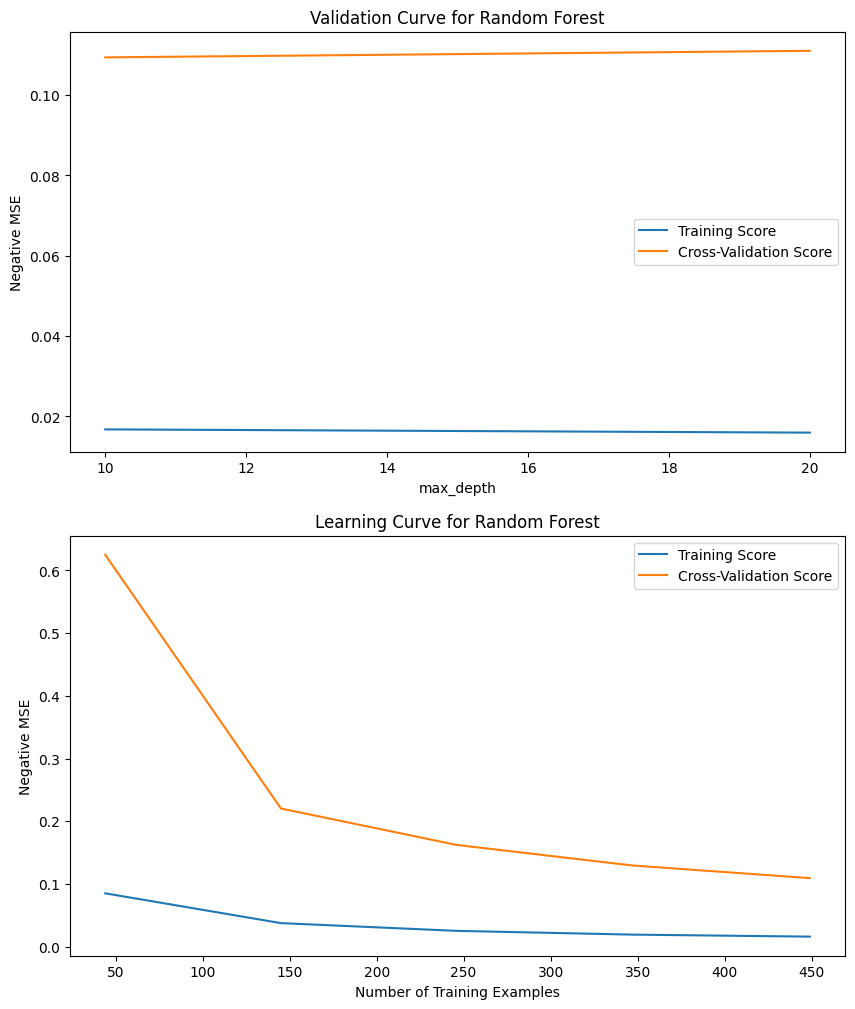

In [ ]:
random_forest = RandomForestRegressor() # select model
param_range = [None, 10, 20]
train_scores_vc, test_scores_vc = validation_curve(
    random_forest, Z_train, yc_train, param_name="max_depth", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1) # create the validation curve using our predefined parameters with cross validation
train_sizes_lc, train_scores_lc, test_scores_lc = learning_curve( # create the learning curve with cross validation
    random_forest, Z_train, yc_train, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # two subplots
from google.colab import drive
# Plot Validation Curve
ax1.plot(param_range, -np.mean(train_scores_vc, axis=1), label="Training Score")
ax1.plot(param_range, -np.mean(test_scores_vc, axis=1), label="Cross-Validation Score")
ax1.set_xlabel("max_depth")
ax1.set_ylabel("Negative MSE")
ax1.set_title("Validation Curve for Random Forest")
ax1.legend()

# Plot Learning Curve
ax2.plot(train_sizes_lc, -np.mean(train_scores_lc, axis=1), label="Training Score")
ax2.plot(train_sizes_lc, -np.mean(test_scores_lc, axis=1), label="Cross-Validation Score")
ax2.set_xlabel("Number of Training Examples")
ax2.set_ylabel("Negative MSE")
ax2.set_title("Learning Curve for Random Forest")
ax2.legend()


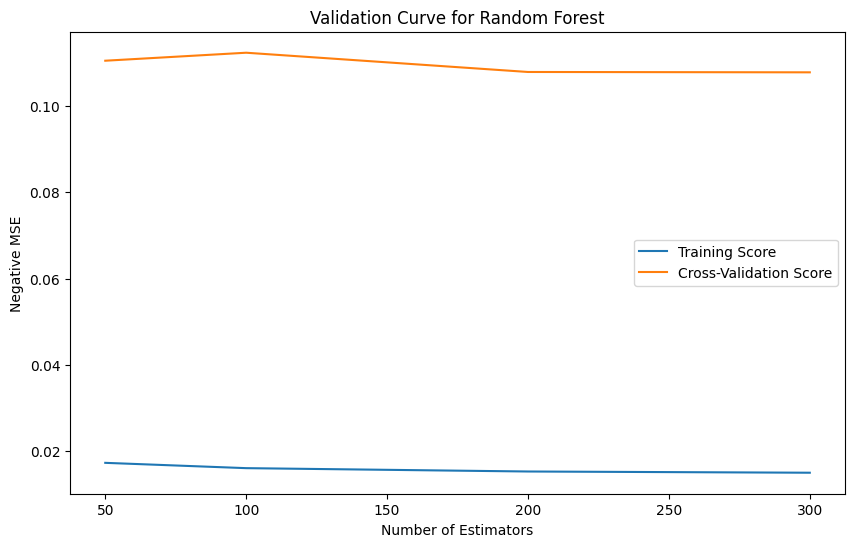

In [ ]:
param_range = [50, 100, 200, 300] # our range to test
train_scores, test_scores = validation_curve( # create the validation curve for n_estimator platform
    random_forest, Z_train, yc_train, param_name="n_estimators", param_range=param_range,
    cv=5, scoring="neg_mean_squared_error", n_jobs=-1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, -np.mean(train_scores, axis=1), label="Training Score")
plt.plot(param_range, -np.mean(test_scores, axis=1), label="Cross-Validation Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Negative MSE")
plt.title("Validation Curve for Random Forest")

plt.legend()
#plt.savefig('learning_curve.png')
plt.show()


In [ ]:
# Create a RandomForestRegressor with specified hyperparameters from learningn and validation curves
best_random_forest = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
best_random_forest.fit(Z_train, yc_train)
predictions = best_random_forest.predict(Z_test)
mse = mean_squared_error(yc_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.09024238214830207


In [ ]:
predictions = best_random_forest.predict(Z_new) # predict values for new test dataset
predictions

array([ 0.30501054, -0.9716486 , -0.62652324,  0.0415518 , -0.90110688,
        0.57581939,  0.35742748, -0.29461755, -1.63167819, -0.97185285,
       -1.55860219, -0.00468385,  2.15750029,  0.58004957,  0.66406837,
        1.97775944, -0.10369883,  1.04924666, -0.08868199, -1.26299795,
        0.05110665, -0.75961629, -0.06971824,  0.41403686, -0.9164356 ,
        1.93962268, -0.6938852 ,  0.84865597, -0.12347645,  0.06474226,
       -0.72212883,  0.85636051, -2.13217884, -0.79817252, -0.00797818,
       -0.85301954,  1.93528028,  1.11279518,  1.79705811, -0.88980537,
       -0.23776659,  1.07848581,  0.2551831 ,  1.99070612,  1.40401435,
        0.95008343,  1.42962951,  0.96936666, -0.51091607,  0.82151774,
        1.19211845, -0.33930339, -0.83550655,  2.2348105 ,  0.45382695,
        0.04128737, -0.88517504,  0.03049091,  0.68734876, -0.68587868,
       -0.01237509, -0.34384508, -0.64721217,  0.45801075, -1.18213552,
       -0.86204363,  0.78537167,  1.66710703,  0.53296002, -1.82